Communiquer sur le web c’est évidemment rédiger du texte, agrémenter d’images, de vidéos ou de sons, référencer mais c’est aussi implanter des hyperliens en mettant en relation des contenus et/ou des organisations. Ainsi le marketing s'appuie sur un positionnement de communication par l'utilisation composée de ces divers éléments (Zabierowski et Ciechanowski, 2016). Identifier la stratégie rémanente à partir de l'analyse de ces éléments s'avère une opération complexe (Pinède 2018, Pinède et al, 2014). Notre position sera de tenter de définir un mode opératoire pour produire une analyse de l'existant. Le point de départ, nécessaire pour la réalisation des choix des critères d'analyse démarre par la restriction à un domaine organisationel particulier tout en rendant transposable la méthodologie à d'autres domaines par l'explicitation des motivations des choix réalisés. Nous fondons notre approche sur une méthodologie propre aux sciences de l'information et de la communication directement inspirée par la bibliométrie : nous focalisons sur la dimension singulière de l'inscription web à travers le lien hypertexte qui, au plan de l'écriture, constitue la possibilité formelle la plus usitée pour établir une citation entre deux entités web.

Il n’y a pas de règles établies pour la description des hyperliens entre les sites :
la motivation de leur mise en place est aussi variée que les choix terminologiques (Reymond, 2007 ; Thelwall, 2006), toutefois nous pouvons formuler quelques hypothèses contextuelles à notre domaine d’analyse : tourisme et parc national. L’hypothèse naïve est que les acteurs du tourisme utilisent l’image du parc pour leur propre communication. Ce qui suit vise à affiner, vérifier et décrire cette hypothèse. 

@Tous : j'ai dû faire un blabla sur le PNPC quelquepart. A insérer ici en 3 lignes.
# Méthodologie
## la zone DNS du PNPC
Elle est décomposée en trois sites.
[à compléter]

## La collecte des liens entrant

Pour l'ensemble des zones DNS de l'organisation ciblée nous avons collecté l'ensemble des liens entrants sur chacune de ces zones sur la base de données ahrefs.com dont l'index, à une époque en accès gratuit pour la recherche, contient en Mai 2020 170 000 milliards de lignes (source : https://ahrefs.com/big-data). 
[à compléter
décrire : les données obtenues (la liste des colonnes que l'on envisageait à un moment de mettre dans le graphe résultant) et le nombre de lignes. Un tableau par ex. pour la présentation (et vous veillez à ce que ce soit présentable ^_^)
]


# Agrégation et préparation de la visualisation

Avant de pouvoir effectuer une quelconque opération de traitement pour voir le réseau de nœuds du contexte sur lequel nous vous proposons qui est celui du Parc National de Port-Cros, il est nécessaire de réaliser un traitement des données en passant entre autres par une agrégation de ces dernières.
[à compléter] 

## Agrégation des données
La zone éditoriale (définie comme l'ensemble des zone DNS associée à une organisation) nous paraît le niveau d'agrégation le plus pertinent à étudier : celle-ci est composée de pages sous la responsabilité éditoriale du parc dont le contenu doit répondre à ses missions essentielles [@Kouamvi : lesquelles ?]

## Filtrage
Pour cibler notre analyse nous focaliserons sur les sites ciblant notre organisation étudiée en excluant les citations provenant d'organisations sous la même tutelle (les sites web des autres parc nationaux français) dont la cohésion du réseau d'interrelations web pourrait brouiller les analyses en se constituant comme autoacttracteur dans les représentations de par son poids.

## Complétion des données et transformations
L'influence territoriale dans le domaine virtuel est souvent arguée, nous produisons une méthode pour associer territoire géographique et site web afin d'identifier des singularités potentielles sur ce plan. Nous nous attendons à ce que au plus l'on se trouve à proximité du parc, au plus la concentration de sites citant le site web du parc augmente.

# Au plan technique
L'ensemble des traitements sera opéré à l'aide du [langage python](https://www.python.org/), la mise en oeuvre de la présentation (et ce document) sous la forme de [jupyter notebook](https://jupyter.org/). Nous faisons ainsi appel à de nombreuses librairies qui permettent de rapidement mettre en oeuvre un traitement simplifié par l'utilisation de puissantes fonctions complexes masquées par la librairie.

## Algorithme du script
[@stagiaires: écrire ici sous forme de pseudo code l'algo utilisé]

## Détail et description des traitements

Afin de pouvoir gérer au mieux, l’ensemble des données dont nous disposons, nous utiliserons un total de trois librairies.

In [1]:
"""Entrée 1-1"""
# ************************[ Librairies Utilisées ]************************************************************************************

import pandas as pd    #Gestion des Dataframes & Import/ Export Csv
from urllib.parse import urlparse #Utilisation de l'option netloc pour filtrer les DNS
import networkx as nx #Utilisation pour export du résultat en format Gexf pour visualisation

* ``Pandas `` nous permettra de gérer le volume important de données présentes dans les trois fichiers `CSV` que nous avons comme source.
* ``Urllib. parse `` nous permettra de filtrer les différentes adresses présentes afin d’en récupérer le nom de domaine uniquement, ce qui nous permet dans la finalité de pouvoir effectuer l’ensemble des opérations que nous avons prévu de réaliser par la suite le plus facilement possible.
* ``networkx `` nous permettra d’avoir une prévisualisation du réseau de nœuds représentant les interactions entre les différents acteurs et le Parc National. Cette librairie nous permettra également d’exporter un fichier `Gexf` qui sera utilisé pour la réalisation d’une carte du réseau plus précise et complète. 

## Les fonctions de ce script

L’action principale de ce script sera d’utiliser la fonction Parser afin de récupérer le nom de domaine d’une adresse présente dans nos données.

In [2]:
"""Entrée 1-2"""
#************************[ Fonctions Utilisées ]************************************************************************************

#On créée une fonction qui va effectuer un netloc (récupération adresse DNS) des adresses présentes dans le document
def Parser(Referring_Url):
    if Referring_Url == '':
        pass
    else:
        obj = urlparse(Referring_Url)
    return obj.netloc

## Prétraitement des données

Chaque `df(x)` présent dans le script a pour but de charger le contenu des fichiers CSV que nous possédons. Dans notre cas de figure, ceux-ci sont au nombre de trois, et chacun traite un des noms de domaine du Parc National (portcrosparcnational.fr, portcros-parcnational.fr et prod-pnpc.parcnational.fr)

Les fichiers sont chargés sous format `utf-16` pour pallier aux problèmes du contenu de ces fichiers, c’est-à-dire la présence de virgules et de points-virgules dans certaines cellules et que nous ne pouvons pas nous permettre de supprimer.

Afin de vérifier le bon chargement des données, on effectue un test afin de vérifier la lecture de ces dernières.

Pour finir, nous réalisons une fusion des trois fichiers initiaux dans la variable dfappend qui contiendra l’ensemble des données, dans lequel nous créons un nouvel index, car chaque CSV avait son propre index, ce qui pourrait causer des problèmes par la suite.


In [3]:
"""Entrée 1-3"""
#************************[ Traitement Initial ]************************************************************************************


df0 = pd.read_csv('www.portcrosparcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouveture de la source 1
df1 = pd.read_csv('www.portcros-parcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouverture de la source 2
df2 = pd.read_csv('prod-pnpc.parcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouverture de la source 3

print(df0.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')
print(df1.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')
print(df2.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')



dfappend = df0.append([df1,df2], ignore_index=True) #On créé le contenu dfappend qui est l'ensemble des csv à la suite. La fonction Ignore_index créé un nouvel index qui ne se base pas sur les précédents.
dfappend = dfappend[~dfappend['Referring Page URL'].str.contains("parcnational.fr")]
dfappend.reset_index(drop=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Columns: 22 entries, # to Linked Domains
dtypes: float64(5), int64(9), object(8)
memory usage: 1.3+ KB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 25 entries, # to Linked Domains
dtypes: float64(5), int64(9), object(11)
memory usage: 1.1+ KB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 22 entries, # to Linked Domains
dtypes: float64(4), int64(8), object(10)
memory usage: 1.2+ KB
None
*****************************************


,#,Domain Rating,URL Rating (desc),Referring Domains,Referring Page URL,Referring Page Title,Internal Links Count,External Links Count,Link URL,TextPre,...,Last Check,Day Lost,Language,Traffic,Keywords,Js rendered,Linked Domains,Redirect chain (from),Redirect chain (to),Redirect type
0,4,55,50,692,http://www.parcsnationaux.fr/fr,Portail des parcs nationaux de France |,121,33,http://www.portcrosparcnational.fr/,NaN,...,22/02/2020 08:31,NaN,fr,1844.0,325,NaN,21,NaN,NaN,NaN
1,2,21,22,23,http://crbpoinfo.blogspot.com/,crbpoinfo,289,27,http://prod-pnpc.parcnational.fr/fr/rapports-s...,"N. Guignard, P. Y. Perroi, C. Moyon, and SCOPS...",...,24/02/2020 13:49,NaN,fr,3.2,1,NaN,8,NaN,NaN,NaN


À partir de ce moment, nous n’utiliserons plus les df(x) pour le traitement des données.


## Traitement et agrégation des données


Pour commencer le traitement de nos données, nous allons utiliser la variable Parser vue auparavant, afin de pouvoir récupérer dans un premier temps les noms de domaine des acteurs recensés dans nos fichiers. Ces noms de domaines seront stockés dans une nouvelle colonne nommée `DNS Source`.

Puis nous allons effectuer la même opération pour déterminer quel nom de domaine est utilisé par ces mêmes acteurs pour utiliser l’image du Parc National de Port Cros.
Ce nom de domaine sera stocké dans une nouvelle colonne nommée `DNS Cible`.

Enfin, nous allons également préparer pour la visualisation de données une dernière colonne nommée `DNS de Sortie` qui va vérifier le nom de domaine cible, et donner dans une troisième colonne, nommée "DNS de Sortie", le nom de domaine sur lequel l’utilisateur arrive après avoir subi une redirection. Cette vérification est effectuée grâce aux connaissances que nous possédons sur le cas présenté.

In [4]:
"""Entrée 1-4"""
#************************[ Ajout de Colonnes Dataframe ]************************************************************************************

dfappend['DNS Source'] = dfappend['Referring Page URL'].apply(lambda x : Parser(x)) #on créé un netloc de Ref dans dfappend
dfappend['DNS Cible'] = dfappend['Link URL'].apply(lambda y : Parser(y))        # On créé un netloc de Link dans dfappend


dfappend['DNS de Sortie'] = dfappend['DNS Cible'] #On créé une colonne DNS Sortie qui est la copie de DNS Cible
dfappend['DNS de Sortie'].replace(to_replace=["www.portcrosparcnational.fr","prod-pnpc.parcnational.fr"], value="www.portcros-parcnational.fr", inplace=True) #On remplace les DNS servant de redirection par le nom du DNS vers lequel ils redirigent (DNS connu)



Par la suite nous allons filtrer l’ensemble du fichier dans la variable `Dfmax`.
Cette variable a pour but de ne contenir qu’une seule page de chaque acteur présent dans le fichier.
Et nous cherchons à ne garder que la page ayant le poids le plus important pour chaque acteur en termes de trafic.

Nous allons donc filtrer avec le Nom de Domaine récupéré précédemment récupéré conjointement à la colonne `Traffic`.

Dans certains cas, certaines pages peuvent avoir la même valeur de trafic, dans ce cas et pour ne pas fausser notre compte nous allons supprimer les doublons.

In [5]:
"""Entrée 1-5"""
#************************[ Filtrage d'occurence : variable dfmax ]************************************************************************************

idx = dfappend.groupby(['DNS Source'])['Traffic'].transform(max) == dfappend['Traffic'] #A partir de la colonne 'DNS Source' nous recherchons l'occurence ayant la plus haute valeur par rapport à la valeur de Traffic
dfmax =dfappend[idx]
dfmax.drop_duplicates('DNS Source', inplace=True)
print(dfmax.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 3 to 13
Columns: 28 entries, # to DNS de Sortie
dtypes: float64(4), int64(8), object(16)
memory usage: 464.0+ bytes
None


Comme vous pourrez le constater, nous passons d’un tableau possédant plus de 280 000 références, à un tableau possédant uniquement 1368 références.

Nous nous sommes donc posé la question suivante : quelle est la fréquence d’utilisation de liens renvoyant aux noms de domaine du Parc National de Port Cros pour chaque acteur ?

Nous avons donc créé un compteur d’occurrences.

Pour cela, nous avons initié la variable `NodeRef`, qui contient le contenu de la colonne "DNS Source", que nous avons réindexé par la suite, pour posséder un index des adresses DNS de nos acteurs, ce qui va nous permettre d’utiliser la fonction Value_Counts() de la librairie Pandas.

Cette dernière va créer une nouvelle liste ou ne sera présent qu’une seule fois chaque Nom de Domaine des différents acteurs, et compter le nombre de fois que ce dernier est présent.

In [6]:
"""Entrée 1-6"""
#************************[ Compteur d'occurences ]************************************************************************************

NodeRef = dfappend['DNS Source'] # Création d'une liste comportant les différents DNS du CSV

NodeIndex= pd.Index(NodeRef) #On créée un index des DNS avec Panda

NodeCount = NodeIndex.value_counts().reset_index() #On compte le nombre de fois que chaque DNS est présent dans la liste (Value_Count) et on attribue un numéro à chaque DNS (reset_index)

NodeCount.columns = ['DNS Source', 'Occurences'] #On renomme les colonnes de manière à ce qu'il soit possible de comprendre leur correspondance

print(NodeCount) #Vérification d'acquisition

Agreg = pd.merge(NodeCount, dfmax, on='DNS Source', how='outer') #On fusionne les deux tableaux (NodeCount, dfmax) à partir de la colonne DNS Source présente au sein des deux


               DNS Source  Occurences
0   www.parcsnationaux.fr           1
1  crbpoinfo.blogspot.com           1


Nous pouvons constater sur l’ensemble des appels aux Noms de Domaines relevés, plus de 83 000 proviennent du site www.bandol-blog.com. C’est-à-dire plus de 29 % des appels de la liste. Nous constatons également que plus de 21 % des appels détectés proviennent du site du Parc National. Il s’agit entre autres, des liens entre les différentes pages du Parc.

Pour notre visualisation de données, ce rendu n’est pas suffisant.
Nous allons donc le fusionner avec la fonction merge de Pandas avec la variable dfmax précédemment créée. Cela nous permettra d’avoir un exemple de page pour chaque Acteur, tout en connaissant le poids de l’acteur dans notre visualisation grâce aux occurrences constatées.

Le contenu sera enregistré dans la variable `Agreg`.

## Restitution et prévisualisation des données


Le traitement principal de nos données étant complet, nous allons exporter ces dernières pour les scripts qui seront utilisés par la suite.


In [7]:
"""Entrée 1-7"""
#************************[ Restitution des données ]************************************************************************************

Agreg.to_csv('agregation_reseau.csv' ,encoding='utf-16', sep="\t") #Fichier de sortie correspondant aux valeurs les plus "fortes" du réseau. (Pour la partie 1)

NodeCount.to_csv('Index_reseau.csv' ,encoding='utf-16', sep="\t") # Index de tous les sites utilisant le réseau sélectionné. Sert de base pour la géolocalisation des différentes entreprises (Pour la partie 2 et 3)

dfappend.to_csv('Appended.csv' , encoding='utf-16', sep="\t") #Fichier comprenant l'ensemble des données sans filtre. Sera utilisé pour l'acquisition de contexte (Pour la partie 3)


Nous créons un total de trois nouveaux fichiers CSV.
* Le premier, `agregation_reseau.csv` contient le contenu de la variable `Agreg`. Il s’agit d’un fichier nous permettant de voir le résultat souhaité de notre traitement des données.
* Le second, `Index_reseau.csv` contient l’index de tous les acteurs utilisant les noms de domaine du Parc national. Grâce à ce dernier, nous allons pouvoir géoréférencer les acteurs et les marquer sur une carte.
* Le troisième, `Appended.csv` contient l’ensemble des données des trois fichiers initiaux, plus le traitement que nous avons effectué sur les adresses présentes sur les fichiers. Cela nous permettra lorsque nous souhaiterons récupérer le contexte de l’appel au nom de domaine du Parc de ne pas avoir à effectuer un nouveau traitement des données.


En plus de ces trois CSV, nous allons également créer un fichier utilisable par le logiciel Gephy pour créer une visualisation détaillée du réseau numérique gravitant autour du Parc National.

### Prévisualisation des données

Nous allons donc convertir la variable Agreg, grâce à la librairie networkx en déterminant les nœuds du réseau. Nous lui expliquons grâce aux lignes de code ci-dessous que la colonne `DNS Source` contient les acteurs pointant vers le Parc.
La Colonne `DNS de Sortie` contient le Nom de Domaine vers lequel chaque acteur renvoie au travers du lien placé dans ses pages.
Enfin, la colonne `occurence` permet d’avoir un poids pour chaque lien.


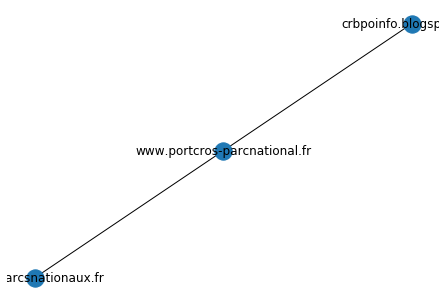

In [8]:
"""Entrée 1-8"""
#************************[ Visualisation de données ]************************************************************************************

G = nx.from_pandas_edgelist(Agreg,'DNS Source','DNS de Sortie','Occurences') #On créée une variable G qui comporte une edgelist pour Panda
nx.draw(G, with_labels=True) #On effectue un essai pour voir si la variable est lisible en format graph
nx.write_gexf(G,"Agregation.gexf") #On exporte la variable G en format gexf sous le nom "Agrégation.gexf"

Par la suite, nous avons utilisé la fonction draw de ``networkx `` afin de vérifier si gephy serait en mesure de comprendre ce que nous avons déterminé. Comme on peut le constater ci-dessus, il est difficile de lire ce qui ressort de cette prévisualisation, car l’ensemble des noms sont superposés. Cependant, nous avons la confirmation que la variable a bien été établie ; dans le cas contraire, nous aurions eu un message d’erreur.

Nous pouvons donc exporter la variable au travers du fichier `Agregation.gexf`.


Avant de passer à la partie suivante, nous allons nettoyer le registre de l’application afin d’alléger la mémoire de cette dernière et éviter d’éventuels conflits par la suite :


In [9]:
whos

Variable    Type         Data/Info
----------------------------------
Agreg       DataFrame                           DN<...>\n\n[8 rows x 29 columns]
G           Graph        
NodeCount   DataFrame                           DN<...>.blogspot.com           1
NodeIndex   Index        Index(['www.mercantour-pa<...>ject', name='DNS Source')
NodeRef     Series       0     www.mercantour-parc<...>DNS Source, dtype: object
Parser      function     <function Parser at 0x0000020E2FEE48B8>
df0         DataFrame       #  Domain Rating  URL <...>\n\n[7 rows x 22 columns]
df1         DataFrame       #  Domain Rating  URL <...>\n\n[5 rows x 25 columns]
df2         DataFrame       #  Domain Rating  URL <...>\n\n[6 rows x 22 columns]
dfappend    DataFrame        #  Domain Rating  URL<...>n\n[18 rows x 28 columns]
dfmax       DataFrame        #  Domain Rating  URL<...>\n\n[8 rows x 28 columns]
idx         Series       0      True\n1      True\<...>ame: Traffic, dtype: bool
nx          module       <mod

Interactive namespace is empty.
